In [1]:
                        #Importing usefull libraries
import pandas as pd 
import numpy as np 
import math
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
da = pd.read_csv('D:/Data/Fish.csv') # Reading the data

In [3]:
da.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Let's check if there is any null values or wrong data types

In [216]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
cols = list(da.columns)
da = da[[cols[0]]+cols[2:]+[cols[1]]] #Re-arranging the columns 
da.head()

,Species,Length1,Length2,Length3,Height,Width,Weight
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0


In [6]:
da.corr() 

,Length1,Length2,Length3,Height,Width,Weight
Length1,1.000000,0.999517,0.992031,0.625378,0.867050,0.915712
Length2,0.999517,1.000000,0.994103,0.640441,0.873547,0.918618
Length3,0.992031,0.994103,1.000000,0.703409,0.878520,0.923044
Height,0.625378,0.640441,0.703409,1.000000,0.792881,0.724345
Width,0.867050,0.873547,0.878520,0.792881,1.000000,0.886507
Weight,0.915712,0.918618,0.923044,0.724345,0.886507,1.000000


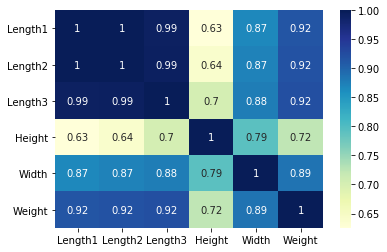

In [8]:
sns.heatmap(da.corr(), annot=True, cmap='YlGnBu')

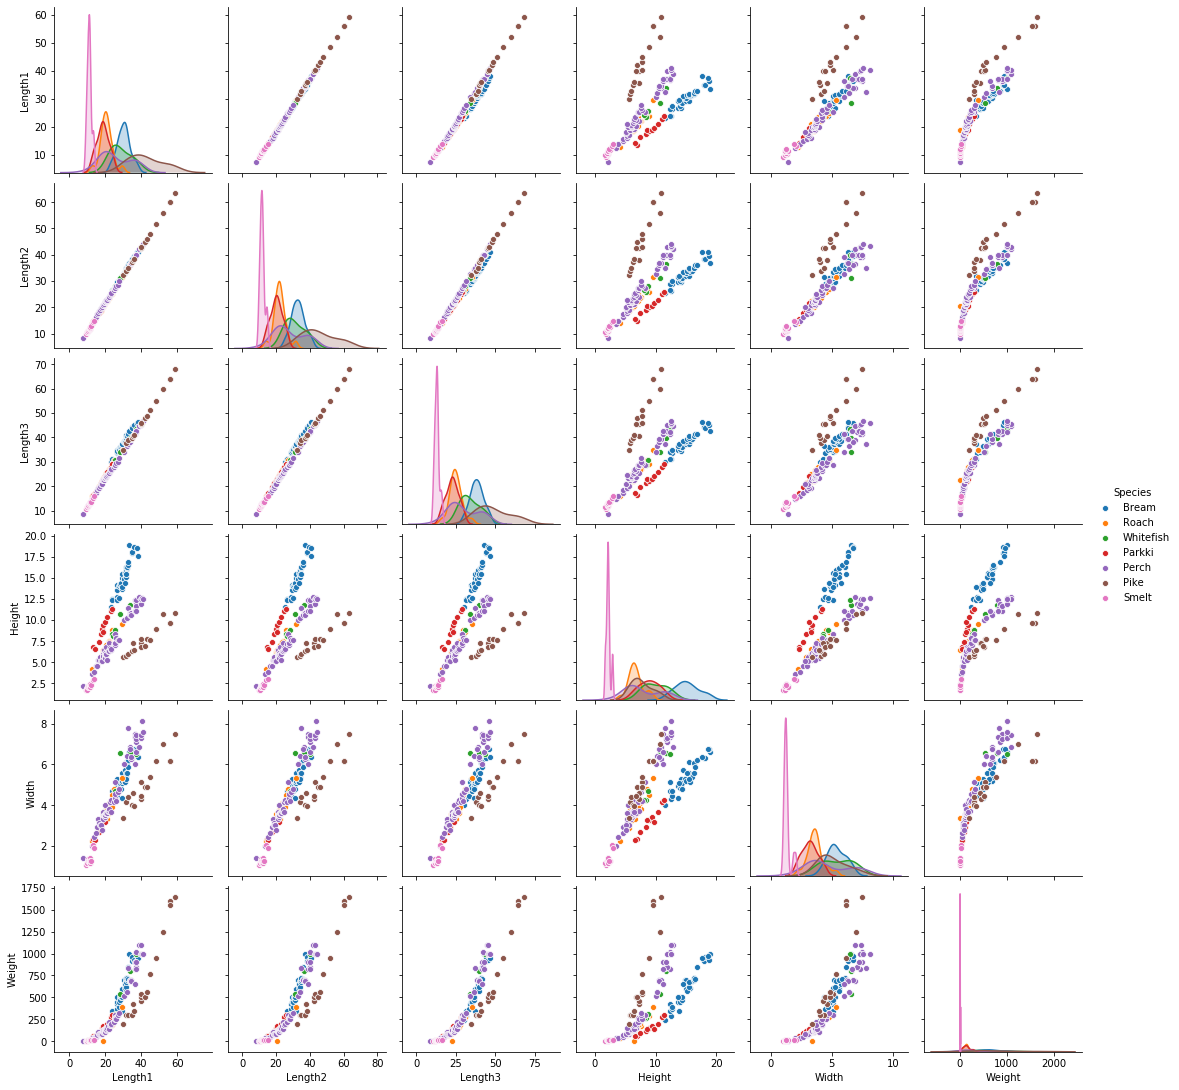

In [9]:
sns.pairplot(da, kind='scatter', hue='Species')

Let's see if there is any outliers in data

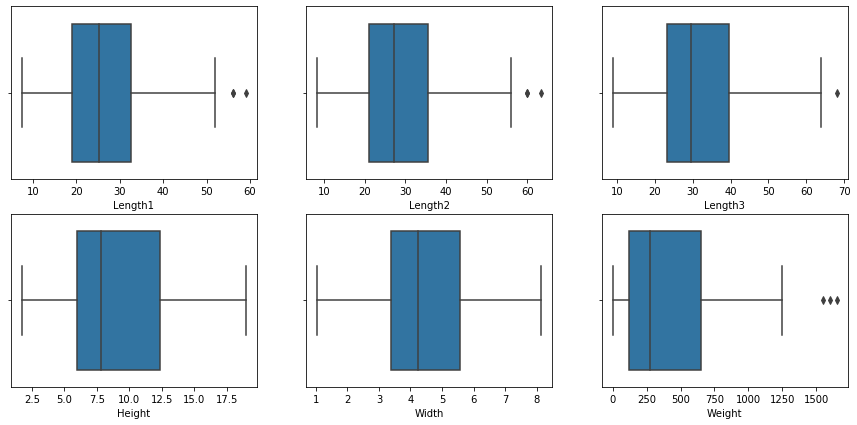

In [15]:
plt.figure(figsize=(15, 7))
plt.subplot(2,3,1)
sns.boxplot(x=da['Length1'])
plt.subplot(2,3,2)
sns.boxplot(x=da['Length2'])
plt.subplot(2,3,3)
sns.boxplot(x=da['Length3'])
plt.subplot(2,3,4)
sns.boxplot(x=da['Height'])
plt.subplot(2,3,5)
sns.boxplot(x=da['Width'])
plt.subplot(2,3,6)
sns.boxplot(x=da['Weight'])

We see outliers in some columns so lest fix them

In [19]:
def detect_outliers(column):
    q1 = column.quantile(.25)
    q3 = column.quantile(.75)
    iqr = q3-q1
    upper_end = q3 + (1.5*iqr)
    lower_end = q1 - (1.5*iqr)
    
    return upper_end,lower_end

In [21]:
a,b = detect_outliers(da['Weight'])
da.loc[(da['Weight']>a) | (da['Weight'] < b)]

,Species,Length1,Length2,Length3,Height,Width,Weight
142,Pike,56.0,60.0,64.0,9.600,6.144,1600.0
143,Pike,56.0,60.0,64.0,9.600,6.144,1550.0
144,Pike,59.0,63.4,68.0,10.812,7.480,1650.0


In [22]:
a,b = detect_outliers(da['Length1'])
da.loc[(da['Length1']>a) | (da['Length1'] < b)]

,Species,Length1,Length2,Length3,Height,Width,Weight
142,Pike,56.0,60.0,64.0,9.600,6.144,1600.0
143,Pike,56.0,60.0,64.0,9.600,6.144,1550.0
144,Pike,59.0,63.4,68.0,10.812,7.480,1650.0


In [23]:
a,b = detect_outliers(da['Length2'])
da.loc[(da['Length2']>a) | (da['Length2'] < b)]

,Species,Length1,Length2,Length3,Height,Width,Weight
142,Pike,56.0,60.0,64.0,9.600,6.144,1600.0
143,Pike,56.0,60.0,64.0,9.600,6.144,1550.0
144,Pike,59.0,63.4,68.0,10.812,7.480,1650.0


In [24]:
a,b = detect_outliers(da['Length3'])
da.loc[(da['Length3']>a) | (da['Length3'] < b)]

,Species,Length1,Length2,Length3,Height,Width,Weight
144,Pike,59.0,63.4,68.0,10.812,7.48,1650.0


In [28]:
da= da.drop([142,143,144]) #Dropping the outliers

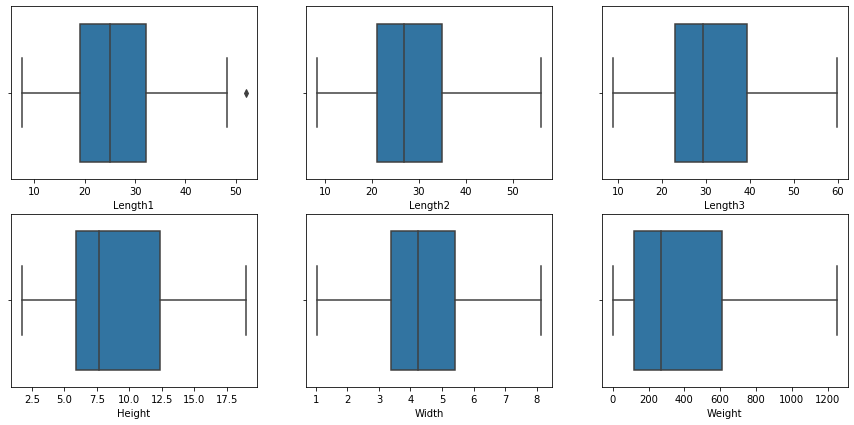

In [29]:
plt.figure(figsize=(15, 7))
plt.subplot(2,3,1)
sns.boxplot(x=da['Length1'])
plt.subplot(2,3,2)
sns.boxplot(x=da['Length2'])
plt.subplot(2,3,3)
sns.boxplot(x=da['Length3'])
plt.subplot(2,3,4)
sns.boxplot(x=da['Height'])
plt.subplot(2,3,5)
sns.boxplot(x=da['Width'])
plt.subplot(2,3,6)
sns.boxplot(x=da['Weight'])

Now the data is clean and ready to be used in model

# Moldeling

In [30]:
x_train,x_test,y_train,y_test = train_test_split(da.drop(columns = ['Weight','Species']),da['Weight'],test_size = 0.3)

In [33]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print('Model coefficients: ', reg.coef_)

Model coefficients:  [ 89.8667171  -25.21551279 -42.69556669  38.61836907  42.64861457]


In [35]:
y_pred = reg.predict(x_test)

In [36]:
print(r2_score(y_test, y_pred))

0.8907994273310985
